In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from seaborn import load_dataset

In [2]:
data = pd.read_csv('/content/tips.csv')

print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
total_bill    0
tip           0
sex           0
smoker        0
day           0
t

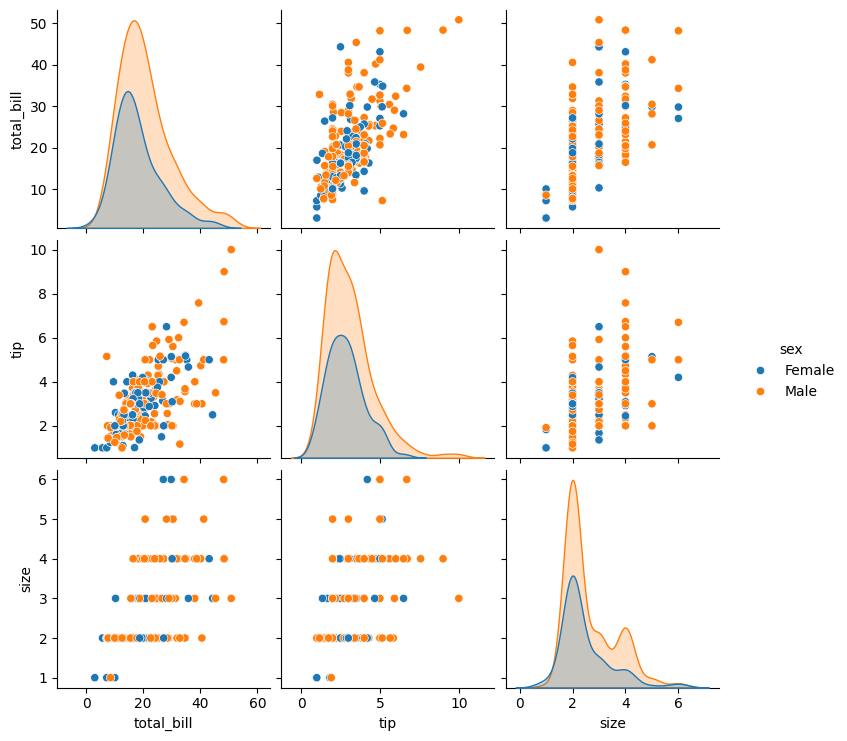

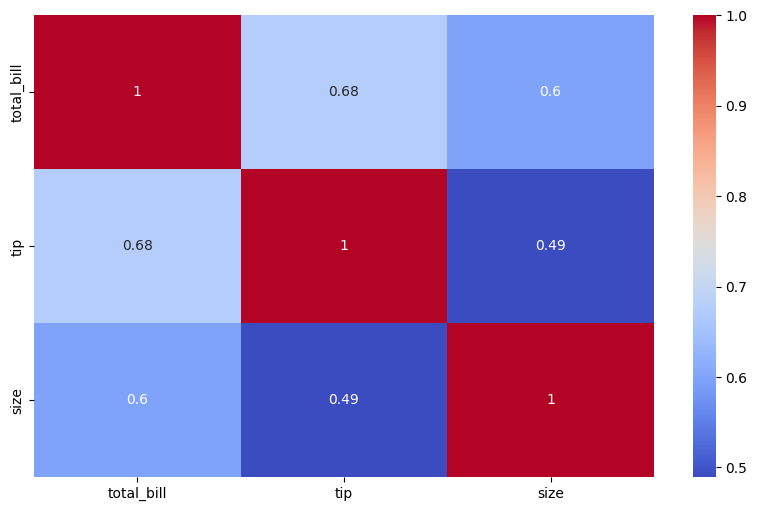

In [7]:
sns.pairplot(data, hue='sex')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop(columns=['tip'])  # Features
y = data['tip']  # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


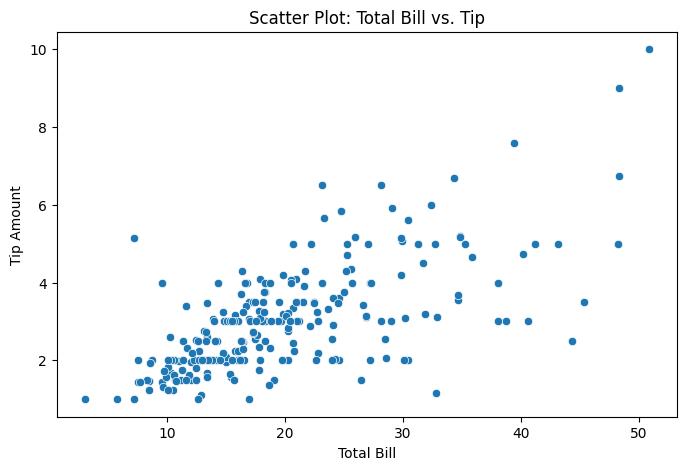

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['total_bill'], y=data['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Scatter Plot: Total Bill vs. Tip")
plt.show()

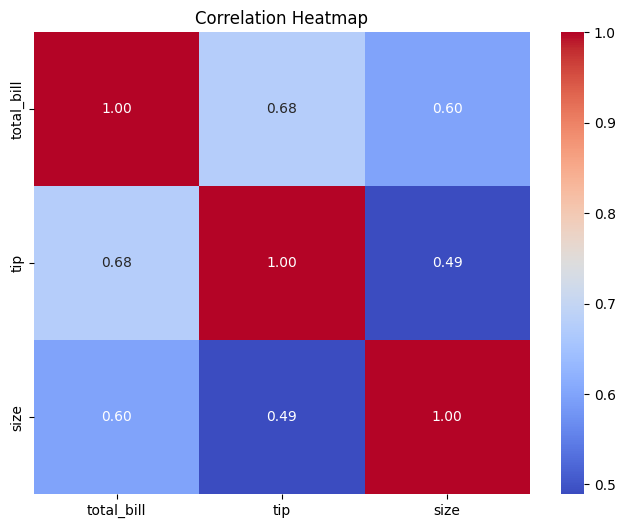

In [22]:
# Convert categorical variables to numerical format before calculating correlation
df_numeric = data.select_dtypes(include=['number'])  # Select only numerical columns

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
categorical_features = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = encoder.fit_transform(data[categorical_features])
categorical_columns = encoder.get_feature_names_out(categorical_features)
categorical_data = pd.DataFrame(categorical_data, columns=categorical_columns)

In [26]:
numerical_features = ['total_bill', 'size']
X = pd.concat([data[numerical_features], categorical_data], axis=1)
y = data['tip']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}


In [30]:
results_data = pd.DataFrame(results).T
print(results_data)


                        MSE      RMSE       MAE        R²
Linear Regression  0.703357  0.838664  0.667133  0.437302
Ridge Regression   0.702071  0.837897  0.667080  0.438331
Lasso Regression   1.448668  1.203606  1.047104 -0.158961


In [31]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge Alpha:", ridge_grid.best_params_)


Best Ridge Alpha: {'alpha': 10}


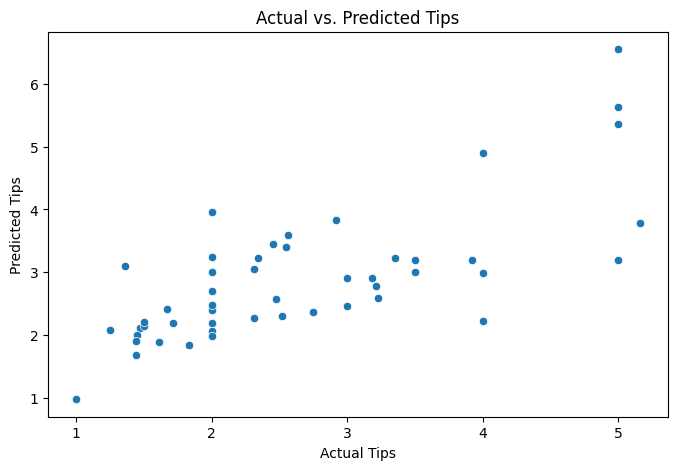

In [32]:
y_final_pred = ridge_grid.best_estimator_.predict(X_test_scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_final_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs. Predicted Tips")
plt.show()

# New Section